In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import zipfile, os

In [2]:
os.listdir('rockpaperscissors')

['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']

In [3]:
base_dir = 'rockpaperscissors/rps-cv-images'
paper = os.path.join(base_dir,'paper')
rock = os.path.join(base_dir,'rock')
scissors = os.path.join(base_dir,'scissors')

In [4]:
train_paper = os.listdir(paper)
train_rock = os.listdir(rock)
train_scissors = os.listdir(scissors)

In [5]:
len(train_paper),len(train_rock),len(train_scissors)

(712, 726, 750)

In [6]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      horizontal_flip=True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      shear_range=0.2,
      fill_mode='nearest',
      validation_split=0.4
      )
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4
)

In [7]:
train_gen = train_datagen.flow_from_directory(
      base_dir, # direktori data latih
      target_size = (150, 200),
      class_mode = 'categorical',
      shuffle = True,
      batch_size = 42,
      seed = 42,
      subset = 'training'
      )

validation_gen = validation_datagen.flow_from_directory(
      base_dir, # direktori data validasi
      target_size = (150,200),
      class_mode = 'categorical',
      shuffle = True,
      batch_size = 42,
      seed = 42,
      subset = 'validation'
      )


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
model = Sequential([
      Conv2D(64, (3,3), activation='relu', input_shape=(150, 200, 3)),
      MaxPooling2D(2, 2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(256, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(5125, (3,3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(512, activation='relu'),
      Dropout(0.5),
      Dense(256, activation='relu'),
      Dropout(0.3),
      Dense(3, activation='softmax')])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 97, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 48, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 46, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 23, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 21, 5125)      1

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [11]:
class MyCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
      if (logs.get('acc') >= 0.98) and (logs.get('val_acc') >= 0.98):
          print("\nReached 98% accuracy, stopping training")
          self.model.stop_training = True

In [12]:
history = model.fit(
    train_gen,
    steps_per_epoch=32,
    epochs=42,
    validation_data=validation_gen,
    validation_steps=7,
    verbose=2,
    callbacks=[MyCallback()]
)

Epoch 1/42
Epoch 1/42
32/32 - 13s - loss: 1.3779 - acc: 0.3174 - val_loss: 1.0942 - val_acc: 0.3231
Epoch 2/42
Epoch 1/42
32/32 - 9s - loss: 1.0249 - acc: 0.4125 - val_loss: 0.8580 - val_acc: 0.6803
Epoch 3/42
Epoch 1/42
32/32 - 10s - loss: 0.8055 - acc: 0.6423 - val_loss: 0.5093 - val_acc: 0.8367
Epoch 4/42
Epoch 1/42
32/32 - 10s - loss: 0.5992 - acc: 0.7352 - val_loss: 0.4357 - val_acc: 0.8741
Epoch 5/42
Epoch 1/42
32/32 - 10s - loss: 0.5268 - acc: 0.7968 - val_loss: 0.3816 - val_acc: 0.8605
Epoch 6/42
Epoch 1/42
32/32 - 10s - loss: 0.4706 - acc: 0.8082 - val_loss: 0.3779 - val_acc: 0.8707
Epoch 7/42
Epoch 1/42
32/32 - 10s - loss: 0.4319 - acc: 0.8265 - val_loss: 0.3055 - val_acc: 0.9014
Epoch 8/42
Epoch 1/42
32/32 - 10s - loss: 0.4175 - acc: 0.8394 - val_loss: 0.4102 - val_acc: 0.8197
Epoch 9/42
Epoch 1/42
32/32 - 10s - loss: 0.4199 - acc: 0.8455 - val_loss: 0.2466 - val_acc: 0.9388
Epoch 10/42
Epoch 1/42
32/32 - 10s - loss: 0.3222 - acc: 0.8813 - val_loss: 0.2366 - val_acc: 0.9354


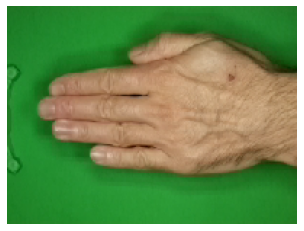


This is Paper


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Input file path
file_path = input("Enter the file path of the image: ")

# Load and process the image
img = image.load_img(file_path, target_size=(150, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
prediction = model.predict(img_array, batch_size=10)
predicted_class = np.argmax(prediction, axis=1)

# Display the image
plt.axis('Off')
plt.imshow(img)
plt.show()

# Print the prediction result
if predicted_class == 0:
    print("\nThis is Paper")
elif predicted_class == 1:
    print("\nThis is Rock")
elif predicted_class == 2:
    print("\nThis is Scissors")
else:
    print("\nInvalid class")